In [1]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

pd.set_option('display.max_rows', None)

# Load a .cvs file with the results of the test after the training 

The information of the table is the case, vanilla or specs, the model loaded, the episode lenght and the reward of that test and the grid size

In [2]:
#df = pd.DataFrame(columns = ["case", "model", "ep_len","reward", "grid"])
df = pd.read_csv("results.csv")
del df["Unnamed: 0"]
print(df)

       case  model  ep_len    reward  grid
0   vanilla      0   288.0  0.000000     6
1   vanilla      1    39.0  0.878125     6
2   vanilla      2   288.0  0.000000     6
3   vanilla      3   288.0  0.000000     6
4   vanilla      4   288.0  0.000000     6
5   vanilla      0    14.0  0.967857     7
6   vanilla      1    12.0  0.972449     7
7   vanilla      2    10.0  0.977041     7
8   vanilla      3    10.0  0.977041     7
9   vanilla      4    16.0  0.963265     7
10  vanilla      0    14.0  0.975391     8
11  vanilla      1   512.0  0.000000     8
12  vanilla      2    16.0  0.971875     8
13  vanilla      3    32.0  0.943750     8
14  vanilla      4    32.0  0.943750     8
15  vanilla      0    16.0  0.977778     9
16  vanilla      1    18.0  0.975000     9
17  vanilla      2    16.0  0.977778     9
18  vanilla      3    16.0  0.977778     9
19  vanilla      4   648.0  0.000000     9
20  vanilla      0   800.0  0.000000    10
21  vanilla      1    19.0  0.978625    10
22  vanilla

# Subplot with the results

In [3]:
# === Aggregate over models ===
agg_df = (
    df.groupby(["case", "grid"])
    .agg(
        mean_reward=("reward", "mean"),
        std_reward=("reward", "std"),
        mean_len=("ep_len", "mean"),
        std_len=("ep_len", "std"),
    )
    .reset_index()
)

colors = {"vanilla": "royalblue", "specs": "darkorange"}

# === Create vertical subplots ===
fig = make_subplots(
    rows=2, cols=1,
    shared_xaxes=True,
    subplot_titles=("Average Episode Reward", "Average Episode Length"),
)

# --- Plot reward ---
for case in agg_df["case"].unique():
    subset = agg_df[agg_df["case"] == case]
    fig.add_trace(
        go.Scatter(
            x=subset["grid"],
            y=subset["mean_reward"],
            mode="lines+markers",
            name=f"{case} (reward)",
            line=dict(color=colors.get(case, "gray")),
            legendgroup=f"{case}_reward",
        ),
        row=1, col=1,
    )
    fig.add_trace(
        go.Scatter(
            x=list(subset["grid"]) + list(subset["grid"][::-1]),
            y=list(subset["mean_reward"] + subset["std_reward"]) +
              list(subset["mean_reward"] - subset["std_reward"])[::-1],
            fill="toself",
            fillcolor=f"rgba(0,0,255,0.1)" if case == "vanilla" else "rgba(255,140,0,0.1)",
            line=dict(color="rgba(255,255,255,0)"),
            showlegend=False,
            hoverinfo="skip",
        ),
        row=1, col=1,
    )

# --- Plot episode length ---
for case in agg_df["case"].unique():
    subset = agg_df[agg_df["case"] == case]
    fig.add_trace(
        go.Scatter(
            x=subset["grid"],
            y=subset["mean_len"],
            mode="lines+markers",
            name=f"{case} (ep_len)",
            line=dict(color=colors.get(case, "gray")),
            legendgroup=f"{case}_len",
        ),
        row=2, col=1,
    )
    fig.add_trace(
        go.Scatter(
            x=list(subset["grid"]) + list(subset["grid"][::-1]),
            y=list(subset["mean_len"] + subset["std_len"]) +
              list(subset["mean_len"] - subset["std_len"])[::-1],
            fill="toself",
            fillcolor=f"rgba(65,105,225,0.15)" if case == "vanilla" else "rgba(255,140,0,0.15)",
            line=dict(color="rgba(255,255,255,0)"),
            showlegend=False,
            hoverinfo="skip",
        ),
        row=2, col=1,
    )

# === Layout ===
fig.update_layout(
    title="Performance vs Grid Size — Vanilla vs Specs",
    height=800,
    width=900,
    template="plotly_white",
    font=dict(size=13),
    legend_title_text="algorithm",
)
fig.update_xaxes(title_text="Grid Size", row=2, col=1)
fig.update_yaxes(title_text="Average Reward", row=1, col=1)
fig.update_yaxes(title_text="Average Episode Length", row=2, col=1)
fig.show()


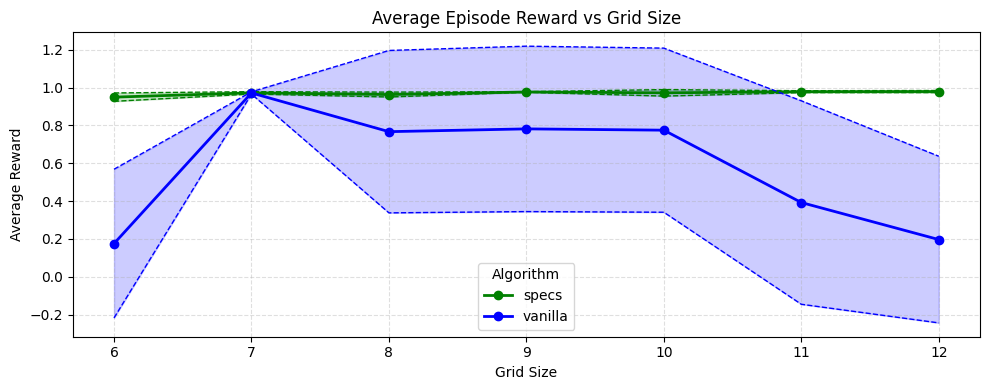

In [10]:
import matplotlib.pyplot as plt
import numpy as np

colors = {"vanilla": "blue", "specs": "green"}

plt.figure(figsize=(10, 4))

for case in agg_df["case"].unique():
    subset = agg_df[agg_df["case"] == case]

    x = subset["grid"]
    mean = subset["mean_reward"]
    std = subset["std_reward"]

    # Mean line + markers
    plt.plot(
        x, mean, marker="o", linewidth=2,
        label=case,
        color=colors[case]
    )

    # Shaded standard deviation region
    plt.fill_between(
        x, mean - std, mean + std,
        color=colors[case], alpha=0.2
    )

    # Dashed standard deviation boundaries
    plt.plot(x, mean + std, "--", color=colors[case], linewidth=1)
    plt.plot(x, mean - std, "--", color=colors[case], linewidth=1)

plt.title("Average Episode Reward vs Grid Size")
plt.xlabel("Grid Size")
plt.ylabel("Average Reward")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(title="Algorithm")
plt.tight_layout()
plt.show()


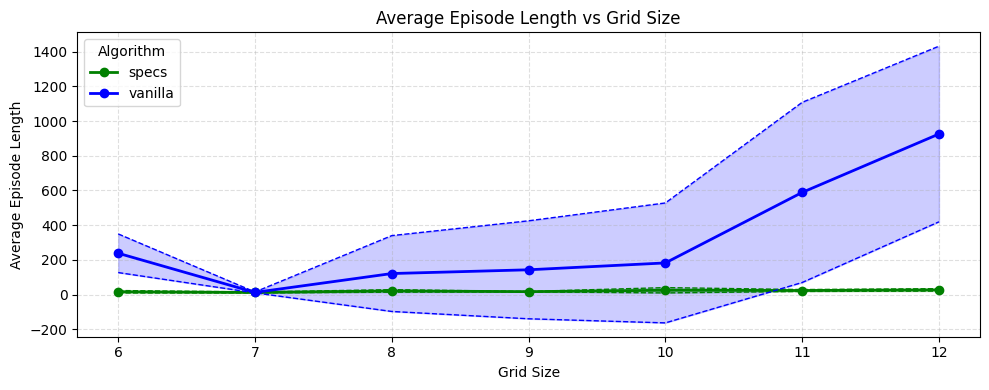

In [11]:
plt.figure(figsize=(10, 4))

for case in agg_df["case"].unique():
    subset = agg_df[agg_df["case"] == case]

    x = subset["grid"]
    mean = subset["mean_len"]
    std = subset["std_len"]

    # Mean line + markers
    plt.plot(
        x, mean, marker="o", linewidth=2,
        label=case,
        color=colors[case]
    )

    # Shaded standard deviation region
    plt.fill_between(
        x, mean - std, mean + std,
        color=colors[case], alpha=0.2
    )

    # Dashed standard deviation boundaries
    plt.plot(x, mean + std, "--", color=colors[case], linewidth=1)
    plt.plot(x, mean - std, "--", color=colors[case], linewidth=1)

plt.title("Average Episode Length vs Grid Size")
plt.xlabel("Grid Size")
plt.ylabel("Average Episode Length")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(title="Algorithm")
plt.tight_layout()
plt.show()


# One plot with all the results in it, reward and episode lenght

In [4]:
import plotly.graph_objects as go

# Aggregate again
agg_df = (
    df.groupby(["case", "grid"])
    .agg(
        mean_reward=("reward", "mean"),
        std_reward=("reward", "std"),
        mean_len=("ep_len", "mean"),
        std_len=("ep_len", "std"),
    )
    .reset_index()
)

colors = {"vanilla": "royalblue", "specs": "darkorange"}

fig = go.Figure()

# --- Reward traces ---
for case in agg_df["case"].unique():
    subset = agg_df[agg_df["case"] == case]
    fig.add_trace(
        go.Scatter(
            x=subset["grid"],
            y=subset["mean_reward"],
            mode="lines+markers",
            name=f"{case} — Reward",
            line=dict(color=colors.get(case, "gray")),
            yaxis="y1",
        )
    )

# --- Episode length traces ---
for case in agg_df["case"].unique():
    subset = agg_df[agg_df["case"] == case]
    fig.add_trace(
        go.Scatter(
            x=subset["grid"],
            y=subset["mean_len"],
            mode="lines+markers",
            name=f"{case} — Ep Length",
            line=dict(color=colors.get(case, "gray"), dash="dot"),
            yaxis="y2",
        )
    )

# Layout with two y-axes
fig.update_layout(
    title="Reward and Episode Length vs Grid Size",
    xaxis_title="Grid Size",
    yaxis=dict(title="Average Reward", side="left"),
    yaxis2=dict(title="Average Episode Length", overlaying="y", side="right"),
    template="plotly_white",
    font=dict(size=13),
    legend_title_text="Metrics",
    height=600,
    width=900,
)

fig.show()


# Same as the subplots, but separately 

In [5]:
import plotly.graph_objects as go

# --- Aggregate the data ---
agg_df = (
    df.groupby(["case", "grid"])
    .agg(
        mean_reward=("reward", "mean"),
        std_reward=("reward", "std"),
        mean_len=("ep_len", "mean"),
        std_len=("ep_len", "std"),
    )
    .reset_index()
)

colors = {"vanilla": "royalblue", "specs": "darkorange"}

# === Plot 1: Reward ===
fig_reward = go.Figure()

for case in agg_df["case"].unique():
    subset = agg_df[agg_df["case"] == case]
    
    # Mean line
    fig_reward.add_trace(
        go.Scatter(
            x=subset["grid"],
            y=subset["mean_reward"],
            mode="lines+markers",
            name=case,
            line=dict(color=colors.get(case, "gray")),
        )
    )

    # Shaded standard deviation
    fig_reward.add_trace(
        go.Scatter(
            x=list(subset["grid"]) + list(subset["grid"][::-1]),
            y=list(subset["mean_reward"] + subset["std_reward"]) +
              list(subset["mean_reward"] - subset["std_reward"])[::-1],
            fill="toself",
            fillcolor=f"rgba(65,105,225,0.15)" if case == "vanilla" else "rgba(255,140,0,0.15)",
            line=dict(color="rgba(255,255,255,0)"),
            showlegend=False,
            hoverinfo="skip",
        )
    )

fig_reward.update_layout(
    #title="Average Episode Reward vs Grid Size",
    xaxis_title="Grid Size",
    yaxis_title="Average Episode Reward",
    template="plotly_white",
    font=dict(size=13),
    height=500,
    width=900,
    legend_title_text="Algorithm",
)
fig_reward.show()


In [6]:
# === Plot 2: Episode Length ===
fig_len = go.Figure()

for case in agg_df["case"].unique():
    subset = agg_df[agg_df["case"] == case]
    
    # Mean line
    fig_len.add_trace(
        go.Scatter(
            x=subset["grid"],
            y=subset["mean_len"],
            mode="lines+markers",
            name=case,
            line=dict(color=colors.get(case, "gray")),
        )
    )

    # Shaded standard deviation
    fig_len.add_trace(
        go.Scatter(
            x=list(subset["grid"]) + list(subset["grid"][::-1]),
            y=list(subset["mean_len"] + subset["std_len"]) +
              list(subset["mean_len"] - subset["std_len"])[::-1],
            fill="toself",
            fillcolor=f"rgba(65,105,225,0.15)" if case == "vanilla" else "rgba(255,140,0,0.15)",
            line=dict(color="rgba(255,255,255,0)"),
            showlegend=False,
            hoverinfo="skip",
        )
    )

fig_len.update_layout(
    #title="Average Episode Length vs Grid Size",
    xaxis_title="Grid Size",
    yaxis_title="Average Episode Length",
    template="plotly_white",
    font=dict(size=13),
    height=500,
    width=900,
    legend_title_text="Algorithm",
)
fig_len.show()


# Plot with bars instead of lines, separate reward and episode lenght

In [7]:
import plotly.express as px
import pandas as pd

# --- Aggregate the data ---
agg_df = (
    df.groupby(["case", "grid"])
    .agg(
        mean_reward=("reward", "mean"),
        std_reward=("reward", "std"),
        mean_len=("ep_len", "mean"),
        std_len=("ep_len", "std"),
    )
    .reset_index()
)

# === Plot 1: Reward ===
fig_reward = px.bar(
    agg_df,
    x="grid",
    y="mean_reward",
    color="case",
    error_y="std_reward",
    barmode="group",
    color_discrete_map={"vanilla": "royalblue", "specs": "darkorange"},
    labels={
        "grid": "Grid Size",
        "mean_reward": "Average Episode Reward",
        "case": "algorithm"
    },
    title="Average Episode Reward vs Grid Size",
)

fig_reward.update_layout(
    template="plotly_white",
    font=dict(size=13),
    height=500,
    width=900,
)
fig_reward.show()


In [8]:
# === Plot 2: Episode Length ===
fig_len = px.bar(
    agg_df,
    x="grid",
    y="mean_len",
    color="case",
    error_y="std_len",
    barmode="group",
    color_discrete_map={"vanilla": "royalblue", "specs": "darkorange"},
    labels={
        "grid": "Grid Size",
        "mean_len": "Average Episode Length",
        "case": "algorithm"
    },
    title="Average Episode Length vs Grid Size",
)

fig_len.update_layout(
    template="plotly_white",
    font=dict(size=13),
    height=500,
    width=900,
)
fig_len.show()


In [9]:
print(agg_df)

       case  grid  mean_reward  std_reward  mean_len     std_len
0     specs     6     0.949375    0.022141      16.2    7.085196
1     specs     7     0.971990    0.006161      12.2    2.683282
2     specs     8     0.963086    0.012797      21.0    7.280110
3     specs     9     0.976667    0.001521      16.8    1.095445
4     specs    10     0.972100    0.017143      24.8   15.238110
5     specs    11     0.978244    0.005033      23.4    5.412947
6     specs    12     0.978906    0.005469      27.0    7.000000
7   vanilla     6     0.175625    0.392709     238.2  111.356185
8   vanilla     7     0.971531    0.005987      12.4    2.607681
9   vanilla     8     0.766953    0.429002     121.2  218.630282
10  vanilla     9     0.781667    0.436967     142.8  282.416713
11  vanilla    10     0.774800    0.433537     182.4  345.655609
12  vanilla    11     0.392562    0.537538     588.8  519.241466
13  vanilla    12     0.196875    0.440226     925.6  506.245790
